In [27]:
from owslib.wms import WebMapService # https://geopython.github.io/OWSLib/#wms
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

import io
import PIL.Image as Image

In [2]:
# WMS service

wms = WebMapService('http://nrt.cmems-du.eu/thredds/wms/global-analysis-forecast-wav-001-027', version='1.3.0')

In [3]:
# Service metadata

print(wms.identification.type)
print(wms.identification.version)
print(wms.identification.title)
print(wms.identification.abstract)
print(list(wms.contents))

WMS
1.3.0
CMEMS DU MFC
Scientific Data
['VHM0', 'VMDR_WW', 'VHM0_WW', 'VMDR_SW1', 'VTM01_SW1', 'VMDR_SW2', 'VTM01_SW2', 'VMDR', 'VTM10', 'VHM0_SW1', 'VHM0_SW2', 'VTPK', 'VSDX', 'VSDY', 'VPED', 'VTM02', 'VTM01_WW']


In [4]:
# Layer metadata

layer = 'VHM0'
print(wms[layer].title)
print(wms[layer].queryable)
print(wms[layer].opaque)
print(wms[layer].boundingBox)
print(wms[layer].boundingBoxWGS84)
print(wms[layer].crsOptions)
print(wms[layer].styles)

sea_surface_wave_significant_height
1
0
(-180.0, -80.0, 179.91666666666663, 90.0, 'CRS:84')
(-180.0, -80.0, 179.91666666666663, 90.0)
['EPSG:32661', 'EPSG:27700', 'EPSG:41001', 'EPSG:3409', 'CRS:84', 'EPSG:900913', 'EPSG:4326', 'EPSG:32761', 'EPSG:3408', 'EPSG:3857', 'EPSG:4258']
{'boxfill/rainbow': {'title': 'boxfill/rainbow', 'legend': 'http://nrt.cmems-du.eu/thredds/wms/global-analysis-forecast-wav-001-027?REQUEST=GetLegendGraphic&LAYER=VHM0&PALETTE=rainbow', 'legend_width': '110', 'legend_height': '264', 'legend_format': 'image/png'}, 'boxfill/occam': {'title': 'boxfill/occam', 'legend': 'http://nrt.cmems-du.eu/thredds/wms/global-analysis-forecast-wav-001-027?REQUEST=GetLegendGraphic&LAYER=VHM0&PALETTE=occam', 'legend_width': '110', 'legend_height': '264', 'legend_format': 'image/png'}, 'boxfill/redblue': {'title': 'boxfill/redblue', 'legend': 'http://nrt.cmems-du.eu/thredds/wms/global-analysis-forecast-wav-001-027?REQUEST=GetLegendGraphic&LAYER=VHM0&PALETTE=redblue', 'legend_width

In [5]:
# Methods

print([op.name for op in wms.operations])
print(wms.getOperationByName('GetMap').methods)
print(wms.getOperationByName('GetMap').formatOptions)

['GetCapabilities', 'GetMap', 'GetFeatureInfo']
[{'type': 'Get', 'url': 'http://nrt.cmems-du.eu/thredds/wms/global-analysis-forecast-wav-001-027'}]
['image/png', 'image/png;mode=32bit', 'image/gif', 'image/jpeg', 'application/vnd.google-earth.kmz']


In [6]:
# Download data

img = wms.getmap(layers=['VHM0'],
                 styles=['boxfill/rainbow'],
                 srs='EPSG:4326',
                 bbox=(-180.0, -80.0, 179.916, 90.0),
                 size=(300, 250),
                 format='image/png',
                )
out = open('global-analysis-forecast-wav-001-027_VHM0.png', 'wb')
out.write(img.read())
out.close()

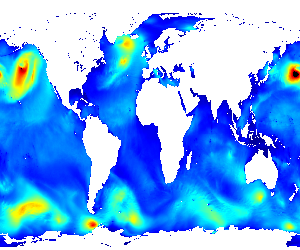

In [28]:
Image.open(io.BytesIO(img.read()))

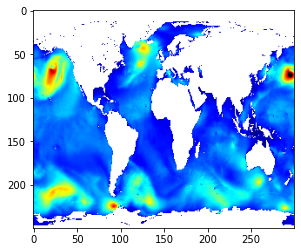

In [29]:
plt.imshow(mpimg.imread('global-analysis-forecast-wav-001-027_VHM0.png'));